## TP1: Analisis de datos 

A continuación se realizará un análisis exploratorio de datos (EDA) sobre el dataset proporcionado. El objetivo es entender mejor la estructura de los datos, identificar patrones y preparar el terreno para un posible modelo de machine learning.

### Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

In [75]:
df = pd.read_csv("C:/Users/n.rodrigues.da.cruz/Downloads/sneep-2023.csv")

In [77]:
pd.set_option("display.max_columns", None)
display(df.head())

,censo_anio,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_descripcion,jurisdiccion_descripcion,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_descripcion,delito1_descripcion,delito2_descripcion,delito3_descripcion,delito4_descripcion,delito5_descripcion,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,es_reincidente_descripcion,tiene_periodo_progresividad_descripcion,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
0,2023,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,Varón,Argentina,Casado/a,Terciario incompleto,Desocupado/a,No tiene ni oficio ni profesión,Urbano,Tucumán,FEDERAL,Condenado/a,30/11/2018 00:00:00,06/11/2020 00:00:00,Deriv. de una instit. Policial,Privación ilegítima de la libertad,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,0.0,2,No,0.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Sin calificación,No,0,No fue lesionado,8,0,3,0.0,Primario/a,No se aplica ninguna,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN
1,2023,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,Varón,Argentina,Soltero/a,Primario incompleto,Trabajador/ra de tiempo parcial,No tiene ni oficio ni profesión,Urbano,Tucumán,PROVINCIAL - Tucumán,Condenado/a,10/11/2011 00:00:00,24/07/2015 00:00:00,Deriv. de una instit. Policial,Homicidios dolosos,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,0.0,1,Si - Recibió Asistencia Médica,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Ejemplar,No,0,No fue lesionado,0,0,8,1.0,Primario/a,No se aplica ninguna,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN
2,2023,Buenos Aires,UNIDAD 30 - GENERAL ALVEAR,42,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado/a,21/10/2022 00:00:00,NaN,Deriv. de otro establecimiento,Violaciones/Abuso sexual,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,1.0,0,NaN,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Ejemplar,No,0,No fue lesionado,0,0,0,NaN,NaN,NaN,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Buenos Aires,UNIDAD 30 - GENERAL ALVEAR,36,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Urbano,Santiago del Estero,PROVINCIAL - Buenos Aires,Procesado/a,25/07/2022 00:00:00,NaN,Deriv. de una instit. Policial,Violaciones/Abuso sexual,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,No participa de ningún programa educativo,1.0,0,NaN,0.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,Ejemplar,No,0,No fue lesionado,0,0,0,NaN,NaN,NaN,Provincial,

In [76]:
# Dropear columnas ids (no aportan información relevante para el análisis)
id_cols = [c for c in df.columns if c.lower().endswith("_id")]
df = df.drop(columns=id_cols)

print("Columnas eliminadas:", len(id_cols))
print("Shape actual:", df.shape)

Columnas eliminadas: 36
Shape actual: (111967, 50)


### Valores faltantes

Reviso % de nulos y las 20 columnas más afectadas.

In [102]:
na_pct = df.isna().mean().sort_values(ascending=False)

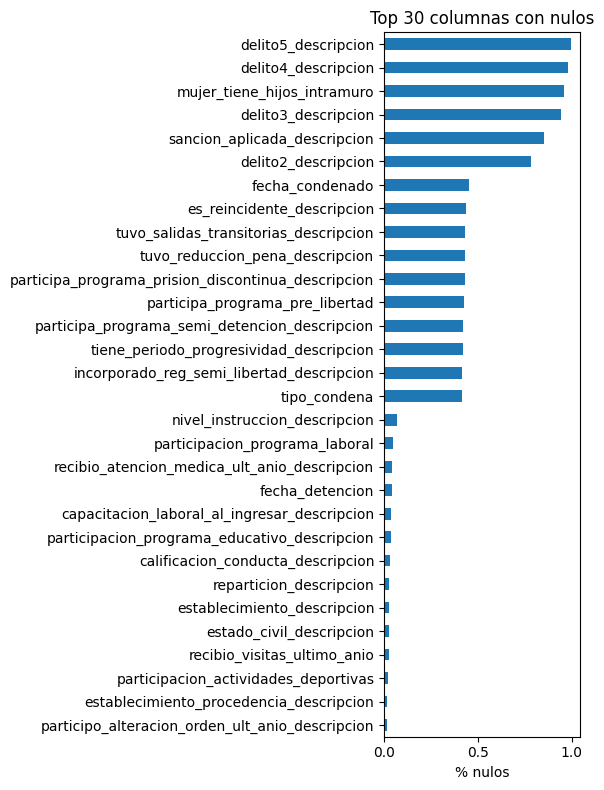

In [103]:
top30 = na_pct.head(30)
top30.plot.barh(figsize=(6,8))
plt.xlabel("% nulos")
plt.title("Top 30 columnas con nulos")
plt.gca().invert_yaxis()
plt.tight_layout()

In [109]:
top30 = na_pct.head(30).index.tolist()
cols_sel = ["situacion_legal_descripcion"] + top30

df[cols_sel].info()
df[cols_sel].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111967 entries, 0 to 111966
Data columns (total 31 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   situacion_legal_descripcion                         111967 non-null  object 
 1   delito5_descripcion                                 521 non-null     object 
 2   delito4_descripcion                                 1863 non-null    object 
 3   mujer_tiene_hijos_intramuro                         4642 non-null    float64
 4   delito3_descripcion                                 6582 non-null    object 
 5   sancion_aplicada_descripcion                        16265 non-null   object 
 6   delito2_descripcion                                 24058 non-null   object 
 7   fecha_condenado                                     61443 non-null   object 
 8   es_reincidente_descripcion                          63036 non-nu

,situacion_legal_descripcion,delito5_descripcion,delito4_descripcion,mujer_tiene_hijos_intramuro,delito3_descripcion,sancion_aplicada_descripcion,delito2_descripcion,fecha_condenado,es_reincidente_descripcion,tuvo_salidas_transitorias_descripcion,tuvo_reduccion_pena_descripcion,participa_programa_prision_discontinua_descripcion,participa_programa_pre_libertad,participa_programa_semi_detencion_descripcion,tiene_periodo_progresividad_descripcion,incorporado_reg_semi_libertad_descripcion,tipo_condena,nivel_instruccion_descripcion,participacion_programa_laboral,recibio_atencion_medica_ult_anio_descripcion,fecha_detencion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_educativo_descripcion,calificacion_conducta_descripcion,reparticion_descripcion,establecimiento_descripcion,estado_civil_descripcion,recibio_visitas_ultimo_anio,participacion_actividades_deportivas,establecimiento_procedencia_descripcion,participo_alteracion_orden_ult_anio_descripcion
0,Condenado/a,NaN,NaN,NaN,NaN,NaN,NaN,06/11/2020 00:00:00,Primario/a,No le fueron otorgadas,No tuvo reducción de pena,No está incorporado/a,0.0,No tiene semidetención,No se aplica ninguna,No está incorporado/a al régimen de semilibertad,0.0,Terciario incompleto,0.0,No,30/11/2018 00:00:00,No tiene ni oficio ni profesión,No participa de ningún programa educativo,Sin calificación,Provincial,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,Casado/a,0.0,0.0,Deriv. de una instit. Policial,No participó de ninguna alteración
1,Condenado/a,NaN,NaN,NaN,NaN,NaN,NaN,24/07/2015 00:00:00,Primario/a,No le fueron otorgadas,No tuvo reducción de pena,No está incorporado/a,0.0,No tiene semidetención,No se aplica ninguna,No está incorporado/a al régimen de semilibertad,1.0,Primario incompleto,0.0,Si - Recibió Asistencia Médica,10/11/2011 00:00:00,No tiene ni oficio ni profesión,No participa de ningún programa educativo,Ejemplar,Provincial,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,Soltero/a,1.0,0.0,Deriv. de una instit. Policial,No participó de ninguna alteración
2,Procesado/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario completo,0.0,NaN,21/10/2022 00:00:00,No tiene ni oficio ni profesión,No participa de ningún programa educativo,Ejemplar,Provincial,UNIDAD 30 - GENERAL ALVEAR,Soltero/a,1.0,1.0,Deriv. de otro establecimiento,No participó de ninguna alteración
3,Procesado/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario completo,0.0,NaN,25/07/2022 00:00:00,No tiene ni oficio ni profesión,No participa de ningún programa educativo,Ejemplar,Provincial,UNIDAD 30 - GENERAL ALVEAR,Soltero/a,0.0,1.0,Deriv. de una instit. Policial,No participó de ninguna alteración
4,Condenado/a,NaN,NaN,NaN,NaN,NaN,NaN,31/07/2019 00:00:00,Reincidente (art. 50 CP),Revocadas durante el último año,No tuvo reducción de pena,No está incorporado/a,0.0,No tiene semidetención,Período de prueba,No está incorporado/a al régimen de semilibertad,0.0,Primario completo,0.0,Si - Recibió Asistencia Médica,06/08/2018 00:00:00,Tiene algún oficio,No participa de ningún programa educativo,Ejemplar,Provincial,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",Soltero/a,1.0,1.0,Deriv. de una instit. Policial,No participó de ninguna alteración
5,Condenado/a,NaN,NaN,NaN,NaN,NaN,NaN,13/09/2023 00:00:00,Primario/a,No le fueron otorgadas,No tuvo reducción de pena,No está incorporado/a,0.0,No tiene semidetención,Período de tratamiento,No está incorporado/a al régimen de semilibertad,0.0,Secundario incompleto,0.0,Si - Recibió Asistencia Médica,07/09/2023 00:00:00,Tiene algún oficio,No participa de ningún programa educativo,Buena,Provincial,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",Soltero/a,1.0,1.0,Deriv. de una instit. Policial,No participó de ninguna alteración
6,Condenado/a,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2018 00:00:00,Reiterante,No le fueron otorgadas,No tuvo reducción de pena,No está incorporado/a,0.0,No tiene semidetención,Período de tratamiento,No está incorporado/a al régimen de semilibert

Se pudo observar que la columna situacion_legal_descripcion afecta directamente el contenido de diversas variables. Siendo así, el valor “Condenado/a” en situacion_legal_descripcion está asociado a tipo_condena, es_reincidente_descripcion, tiene_periodo_progresividad_descripcion, tuvo_salidas_transitorias_descripcion, incorporado_reg_semi_libertad_descripcion, participa_programa_pre_libertad, participa_programa_prision_discontinua_descripcion y participa_programa_semi_detencion_descripcion; todas estas columnas presentan valores nulos cuando situacion_legal_descripcion difiere de “Condenado/a”.

### Analisis de variables numéricas

In [81]:
# analisis de variables numéricas
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
censo_anio,111967.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
edad,111967.0,35.490448,11.855098,0.0,27.0,33.0,42.0,93.0
participacion_programa_laboral,106793.0,0.170105,0.375727,0.0,0.0,0.0,0.0,1.0
participacion_actividades_deportivas,109740.0,0.686359,0.463975,0.0,0.0,1.0,1.0,1.0
recibio_atencion_medica_ult_anio,111967.0,3.555548,5.696636,0.0,1.0,1.0,2.0,19.0
recibio_visitas_ultimo_anio,109155.0,0.873437,0.332484,0.0,1.0,1.0,1.0,1.0
tentativa_suicidio,111967.0,0.012513,0.152487,0.0,0.0,0.0,0.0,2.0
duracion_condena_anios,111967.0,4.202720,5.524423,0.0,0.0,3.0,7.0,52.0
duracion_condena_meses,111967.0,1.334420,2.902327,0.0,0.0,0.0,0.0,48.0
duracion_condena_rango,111967.0,1.831620,2.079572,0.0,0.0,1.0,3.0,8.0


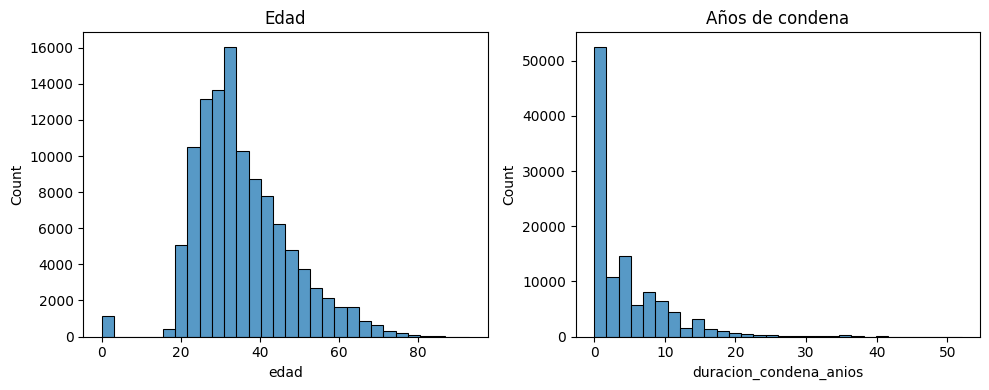

In [ ]:
# histogramas de edad y años de condena
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['edad'].dropna(), bins=30, ax=ax[0])
ax[0].set_title("Edad")
sns.histplot(df['duracion_condena_anios'].dropna(), bins=30, ax=ax[1])
ax[1].set_title("Años de condena")
plt.tight_layout()


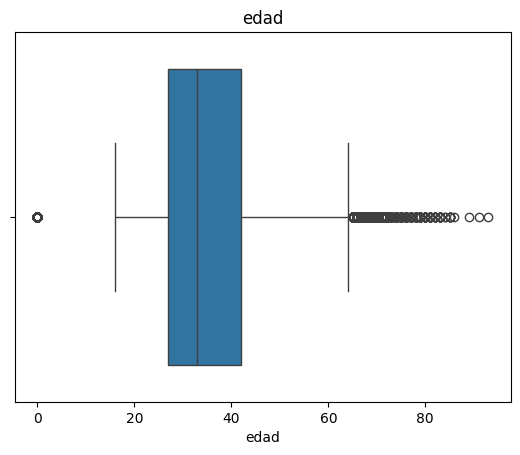

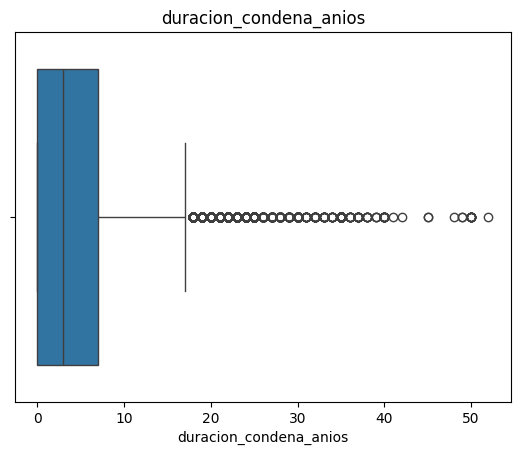

In [83]:
# outliers en edad o años de condena
for col in ['edad', 'duracion_condena_anios']:
    sns.boxplot(x=df[col]); plt.title(col); plt.show()

### Analisis de variables categóricas


In [84]:
cat_cols = [c for c in df.select_dtypes(include="object").columns
            if not c.lower().endswith("_id")]

nunique    = df[cat_cols].nunique()
pct_nulos  = df[cat_cols].isna().mean().mul(100)

cat_summary = (
    pd.concat([nunique, pct_nulos], axis=1)
      .rename(columns={0: "nunique", 1: "pct_nulos"})
      .sort_values("nunique", ascending=False)
)

cat_summary

,nunique,pct_nulos
fecha_detencion,6348,4.293229
fecha_condenado,4879,45.124010
establecimiento_descripcion,325,2.690078
delito2_descripcion,30,78.513312
delito1_descripcion,30,0.526941
delito3_descripcion,29,94.121482
jurisdiccion_descripcion,26,0.010717
delito4_descripcion,25,98.336117
provincia_descripcion,24,0.000000
ultima_provincia_residencia_descripcion,24,0.527834


Varias de estas columnas tiene una alta dependencia del estado de la situación legal, siendo esta diferente a Condenado/a presentaran valores nulos

In [85]:
#Tipos de situaciones legales
df['situacion_legal_descripcion'].value_counts()

situacion_legal_descripcion
Condenado/a       67352
Procesado/a       43459
Otra situación      864
Inimputable         292
Name: count, dtype: int64

In [86]:
# analisis de condenados por provincia
cond_flag = df['situacion_legal_descripcion'] \
              .astype(str) \
              .str.contains("Condenad", case=False, na=False)

# proporcion por provincia
prov_stats = (
    df.assign(cond=cond_flag)
      .groupby('provincia_descripcion')
      .agg(total=('cond', 'size'),
           condenados=('cond', 'sum'))
      .assign(pct=lambda d: d['condenados'] / d['total'] * 100)
      .sort_values('condenados', ascending=False)
)

# provincias con mas personas condenadas
top5_abs = prov_stats.head(24)
print(top5_abs[['condenados', 'total', 'pct']])

                        condenados  total        pct
provincia_descripcion                               
Buenos Aires                 29361  56736  51.750212
Córdoba                       6295  12529  50.243435
Santa Fe                      5757   8426  68.324235
Mendoza                       4931   6724  73.334325
Salta                         3463   4611  75.103015
Entre Rios                    2333   2659  87.739752
Chaco                         1585   1770  89.548023
Río Negro                     1575   1728  91.145833
San Juan                      1525   1784  85.482063
Tucumán                       1340   1452  92.286501
Misiones                      1088   1909  56.993190
Neuquén                       1014   1042  97.312860
Jujuy                          925   1301  71.099154
Corrientes                     921   1327  69.404672
Santiago del Estero            908   1112  81.654676
Chubut                         896   1092  82.051282
La Pampa                       848   1017  83.

In [87]:
df['nacionalidad_descripcion'].value_counts()

nacionalidad_descripcion
Argentina      104332
Otras            2119
Paraguaya        1923
Boliviana         905
Peruana           857
Chilena           479
Uruguaya          267
Colombiana        202
Brasileña          82
China              38
Ecuatoriana        20
Española            9
Italiana            8
Nigeriana           3
Sudafricana         2
Name: count, dtype: int64

In [88]:
# Delitos por provincia
top_provs = df['provincia_descripcion'].value_counts().head(5).index
top_del = df['delito1_descripcion'].value_counts().head(8).index

df_wide = (
    df[df['provincia_descripcion'].isin(top_provs) & 
       df['delito1_descripcion'].isin(top_del)]
    .groupby(['provincia_descripcion', 'delito1_descripcion'])
    .size()
    .unstack(fill_value=0)
)

df_wide


delito1_descripcion,Amenazas,Homicidios dolosos,Hurto y/o tentativa de hurto,Infracción ley n° 23.737 (estupefacientes),Lesiones Dolosas,Otros delitos contra las personas,Robo y/o tentativa de robo,Violaciones/Abuso sexual
provincia_descripcion,,,,,,,,
Buenos Aires,1740,6706,1211,6510,1223,1568,20407,9389
Córdoba,757,730,343,1162,531,499,4319,1742
Mendoza,442,882,552,730,620,65,1512,1274
Salta,163,632,173,993,232,6,935,1036
Santa Fe,313,1548,147,535,268,146,2692,1198


### Problema de ML elegido

El problema de ML elegido es un modelo de clasificación para predecir si una persona privada de libertad obtiene una salida transitoria.
Se toma como variable objetivo tuvo_salidas_transitorias_descripcion, y se la transforma de forma tal que:
1 = “Sí – goza de salidas transitorias”
0 = resto (incluye nulos).

En Argentina, las salidas transitorias son fundamentales para la reinserción de la población penitenciaria en la sociedad. Con este modelo buscamos identificar los factores demográficos, procesales y penitenciarios asociados a su concesión, a fin de orientar y optimizar las políticas de reinserción.


In [ ]:
# creación varialbe target
tc = 'tuvo_salidas_transitorias_descripcion'
df['target'] = (
    df[tc]
      .astype(str)
      .str.contains("Si - goza de salidas transitorias", case=False, na=False)
).astype(int)

In [92]:
#distribución del target
df['target'].value_counts()

target
0    107974
1      3993
Name: count, dtype: int64

In [93]:
# situacion legal vs salidas
pd.crosstab(df['situacion_legal_descripcion'], df['tuvo_salidas_transitorias_descripcion'])

tuvo_salidas_transitorias_descripcion,No le fueron otorgadas,Revocadas durante el último año,Si - goza de salidas transitorias,Suspendidas durante el último año
situacion_legal_descripcion,,,,
Condenado/a,59074,188,3993,145


In [98]:
df_condenados = df[df['situacion_legal_descripcion'].str.contains("Condenad", case=False, na=False)]

Teniendo esta variable como objetivo, el análisis solo se aplica a registros de personas condenadas, ya que la salida transitoria únicamente puede otorgarse a quien ha sido efectivamente condenado.

A continuación se evalua la corrrelacion entre las variables númericas en el dataframe, incluyendo el target (si se excluyen las que luego pasaran a ser numericas en el feature engineering):

Text(0.5, 1.0, 'Matriz de correlaciones')

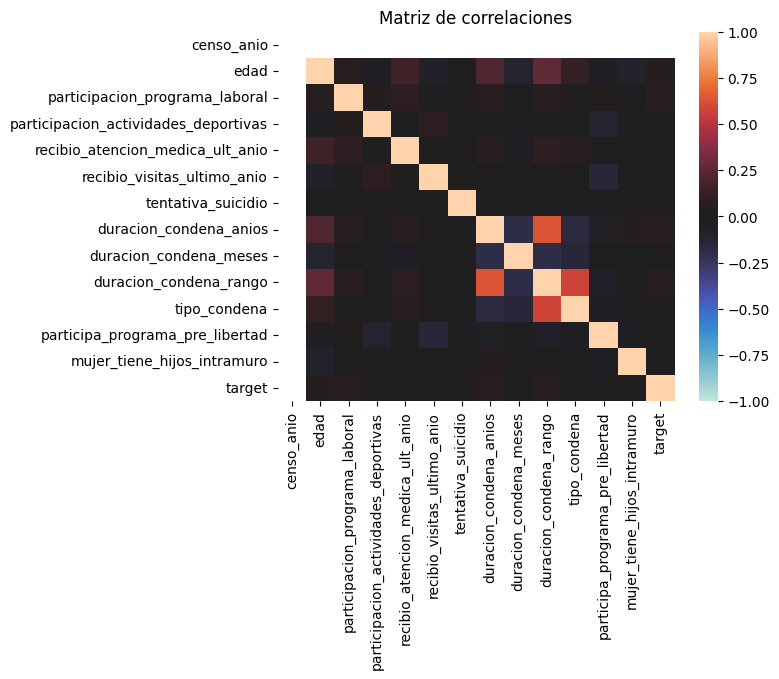

In [99]:
num = df_condenados.select_dtypes(include="number").columns
corr = df_condenados[num].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0)
plt.title("Matriz de correlaciones")

Existe una alta correlación entre años, meses y rango de condena pasando a ser variables prácticamente redundantes.

El target muestra correlaciones débiles con edad y con duración de condena pero en general no se ven correlaciones fuertes entre las variables y el target por lo que para mejorar la predicción será clave combinar numéricas con categóricas y crear nuevas features.

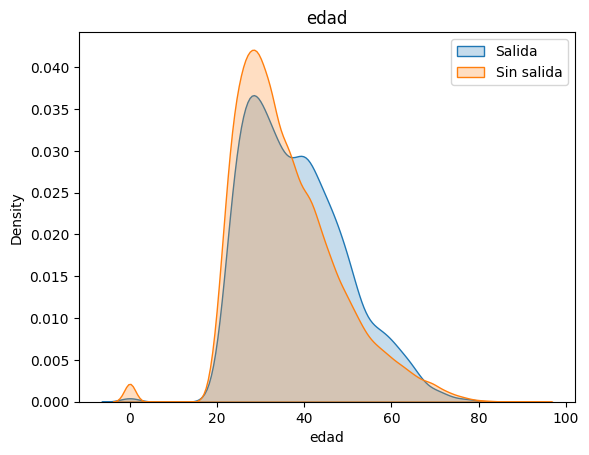

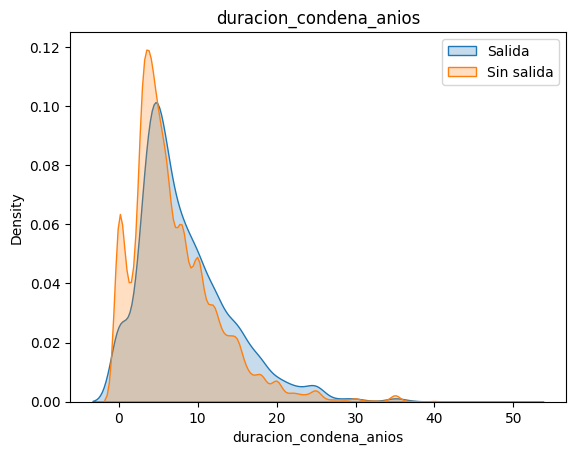

In [100]:
# comparar distribuciones de edad y duración de condena contra el target
for col in ['edad', 'duracion_condena_anios']:
    sns.kdeplot(df_condenados.loc[df_condenados['target']==1, col], label="Salida", fill=True)
    sns.kdeplot(df_condenados.loc[df_condenados['target']==0, col], label="Sin salida", fill=True)
    plt.title(col)
    plt.legend()
    plt.show()


- Excluyendo los datos incorrectos presentes en la variable (personas con 0 años) el pico de edad de quienes no tuvieron salidas transitorias está ligeramente desplazado hacia edades más jóvenes (entre 25 y 35 años) mientras que quienes obtuvieron salidas presentan una distribución más “achatada” entre los 30 y 50 años.

- Las condenas cortas (< 1 año) suelen ser sin salida. Entre quienes sí tuvieron salida, la mayoría acumula entre 3 y 15 años de condena, con un máximo de densidad alrededor de 8 años.
